In [2]:
#import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def generate_data(true_coeffs=np.array([10, 1]), noise_std=2, num_samples=100):

  #Seed for reproducibility
  np.random.seed(4500) #agarra siempre el mismo set de datos, en este caso 4500

  #Generate synthetic data
  x = np.arange(0, 100, 1) #arreglo de 0 a 100 en pasos de 1
  y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples) #random con distribución normal: centro de la distribución, desv estandar, tamaño del array de salida

  #Return features and response
  return (x,y)

In [4]:
#Generate a synthetic dataset for a simple linear regression
true_coeffs = np.array([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

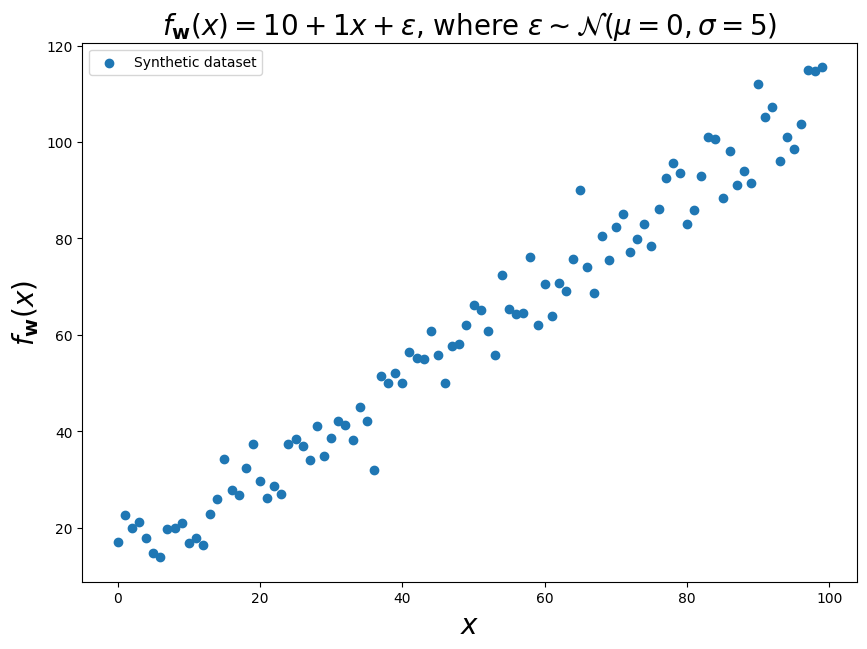

In [5]:
#Visualize the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

In [6]:
#Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True) #random_state se asegura de reproducir la separacion de datos en cada corrida, shuffle indica si hay que sortear los datos antes de hacer split


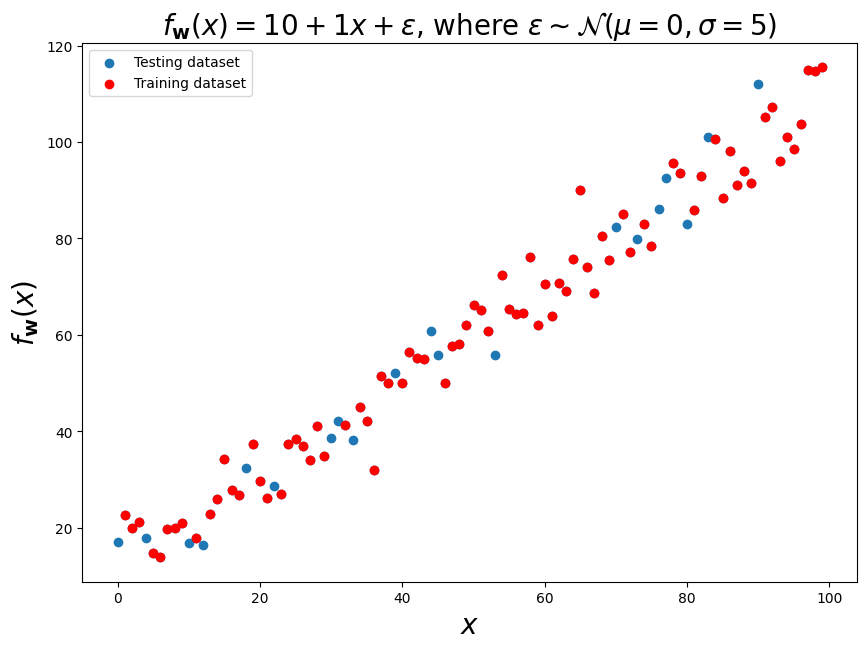

In [7]:
#Visualize the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

In [8]:
#Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([ #Sequential tambien functional
    tf.keras.layers.Input(shape=(1,)), # especifica cuantos datos toma el modelo
    tf.keras.layers.Dense(10, activation='relu'),  # First dense layer with 10 units and ReLU activation
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1) #Cuantas capas
])

#Compile the model
model.compile(optimizer='adam', loss='mse') #Optimizador y error entre lo que deberia de predecir y lo que predice el modelo

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Train the model
model.fit(x_train, y_train, epochs=300, batch_size=3, validation_split=0.10, verbose=1)

#Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3106.5984 - val_loss: 3319.3223
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2022.2291 - val_loss: 2225.7302
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1308.7700 - val_loss: 1394.9270
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 801.5627 - val_loss: 834.2066
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 467.1325 - val_loss: 472.4879
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 267.4701 - val_loss: 247.2323
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.3303 - val_loss: 126.8795
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.0170 - val_loss: 71.4783
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.7903 - val_loss: 43.7317
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.6110 - val_loss: 33.2823
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.4136 - val_loss: 27.8813
Epoch 12/300
24/24 ━━

Una capa con una neurona

*   epochs=500, batch_size=5 -> 42.84
*   epochs=500, batch_size=10 -> 48.64
*   **epochs=300, batch_size=3 -> 42.12**

Dos capas: una de tres con relu y otra de 1

*   epochs=500, batch_size=10 -> 40.95
*   epochs=500, batch_size=5 -> 36.55
*   **epochs=300, batch_size=5 -> 30.77**
*   epochs=300, batch_size=3 -> 32.95

Dos capas: una de 10 con relu y otra de 1

*   **epochs=300, batch_size=3 -> 29.71**
*   epochs=300, batch_size=5 -> 41.33

Tres capas: una de 10 con relu, una de 3 con relu y otra de 1

*   epochs=300, batch_size=5 -> 35.09
*   epochs=500, batch_size=5 -> 31.18
*   **epochs=300, batch_size=3 -> 29.73**

In [11]:
#Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[ 0.2134181  -0.38059595  0.7223617   0.57432574 -0.6629796  -0.10960704
   0.64735633  0.7983005  -0.70761734  0.09573013]]
Biases [w0]: [ 2.0066385   0.          2.0696278   1.9555538   0.          0.
  0.16873406  2.051366    0.         -0.80356973]


In [12]:
#Make predictions
y_pred = model.predict(x_test)

y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


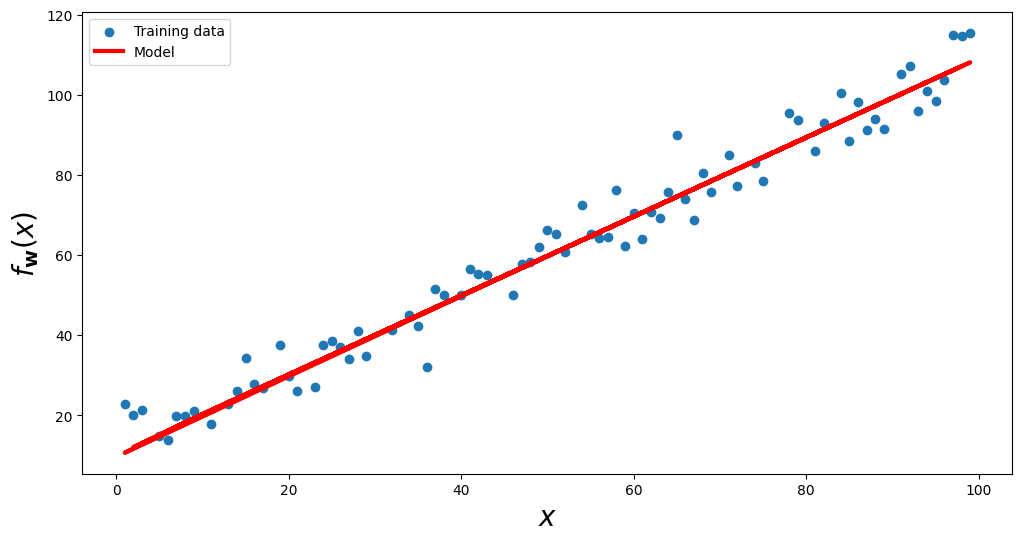

In [13]:
#Plot the results

plt.figure(figsize=(12,6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.legend();